In [ ]:
!wget "http://labfile.oss.aliyuncs.com/courses/1081/avatar.zip"
!unzip -o 'avatar.zip'

--2020-09-17 22:24:33--  http://labfile.oss.aliyuncs.com/courses/1081/avatar.zip
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 47.110.177.159
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|47.110.177.159|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10662195 (10M) [application/zip]
Saving to: ‘avatar.zip’

avatar.zip          100%[===================>]  10.17M  2.97MB/s    in 3.4s    

2020-09-17 22:24:37 (2.97 MB/s) - ‘avatar.zip’ saved [10662195/10662195]

Archive:  avatar.zip
   creating: avatar/
   creating: avatar/data/
  inflating: avatar/data/avatar_0001.jpg  
  inflating: avatar/data/avatar_0002.jpg  
  inflating: avatar/data/avatar_0003.png  
  inflating: avatar/data/avatar_0004.png  
  inflating: avatar/data/avatar_0005.jpg  
  inflating: avatar/data/avatar_0006.jpg  
  inflating: avatar/data/avatar_0007.jpg  
  inflating: avatar/data/avatar_0008.jpg  
  inflating: avatar/data/avatar_0009.png  
  inflating: avat

In [1]:
import tensorflow as tf

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

path='avatar/data/'
fs=os.listdir('avatar/data/')
img=cv2.imread(path+fs[0])
img.shape

(96, 96, 3)

In [4]:
imgs_batch=np.random.choice(fs,3000)
imgs_batch

array(['avatar_0133.jpg', 'avatar_1205.jpg', 'avatar_0829.jpg', ...,
       'avatar_1942.jpg', 'avatar_2088.png', 'avatar_1356.jpg'],
      dtype='<U15')

In [5]:
sample_dim=(16,)+(64,64,3)
sample_dim

(16, 64, 64, 3)

In [6]:
len(fs)

3000

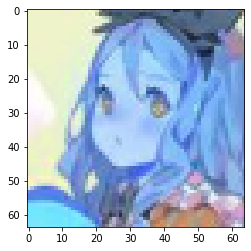

In [7]:
from IPython import display

samples=np.empty((3000,64,64,3),dtype=np.float32)
for i,p in enumerate(imgs_batch):
    img=cv2.imread(path+p)
    img=cv2.resize(img,(64,64))
    plt.imshow(img)
    #display.display(plt.gcf())
    #display.clear_output(wait=True)
    samples[i,...]=img

In [8]:
samples.shape

(3000, 64, 64, 3)

In [9]:
samples=samples/127.5-1
samples[0]

array([[[-0.54509807, -0.6627451 , -0.32549018],
        [-0.5294118 , -0.69411767, -0.35686272],
        [-0.4352941 , -0.654902  , -0.3098039 ],
        ...,
        [ 0.88235295,  0.8980392 ,  0.8901961 ],
        [ 0.81960785,  0.8352941 ,  0.8352941 ],
        [-0.64705884, -0.64705884, -0.6392157 ]],

       [[-0.56078434, -0.67058825, -0.31764704],
        [-0.5372549 , -0.6862745 , -0.34117645],
        [-0.46666664, -0.6627451 , -0.31764704],
        ...,
        [ 0.92941177,  0.9529412 ,  0.9372549 ],
        [ 0.54509807,  0.56078434,  0.5529412 ],
        [-0.92156863, -0.92156863, -0.92156863]],

       [[-0.56078434, -0.6784314 , -0.30196077],
        [-0.5294118 , -0.67058825, -0.29411763],
        [-0.5058824 , -0.67058825, -0.31764704],
        ...,
        [ 0.9529412 ,  0.9764706 ,  0.9607843 ],
        [ 0.07450986,  0.09803927,  0.07450986],
        [-0.94509804, -0.92156863, -0.94509804]],

       ...,

       [[-0.4352941 , -0.6156863 , -0.17647058],
        [-0

In [10]:
sample_data=tf.data.Dataset.from_tensor_slices(samples).shuffle(3000).batch(16)

import glob

glob.glob('avatar/data/*.jpg')

raw_data=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,zoom_range=.2)
train_data=raw_data.flow_from_directory('avatar/',target_size=(64,64),batch_size=16)

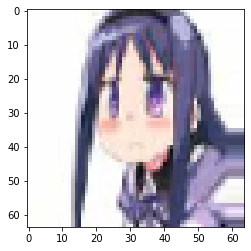

In [ ]:
imgs,labels=next(train_data)

import matplotlib.pyplot as plt

plt.imshow(imgs[0])

imgs[0].shape

imgs.shape

In [37]:
g_model=tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(512,kernel_size=(4,4),strides=(1,1),input_shape=(1,1,100)),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2DTranspose(256,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2DTranspose(128,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2DTranspose(64,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2DTranspose(3,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.Activation('tanh')
])

#opt=tf.keras.optimizers.Adam(lr=.0002,beta_1=.5)
#g_model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['acc'])
g_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_5 (Conv2DTr (None, 4, 4, 512)         819712    
_________________________________________________________________
batch_normalization_8 (Batch (None, 4, 4, 512)         2048      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 8, 8, 256)         2097408   
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 16, 16, 128)      

In [38]:
d_model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(4,4),strides=(2,2),padding='same',input_shape=(64,64,3)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(128,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(256,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(512,kernel_size=(4,4),strides=(2,2),padding='same'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.BatchNormalization(epsilon=1e-05,momentum=.1),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(1,kernel_size=(4,4),strides=(1,1),padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
])

#d_model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['acc'])
d_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        3136      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 128)      

d_model.fit_generator(train_data,steps_per_epoch=10,epochs=10)

def generate_fake_avatars(half_batch=8):
    x=np.random.rand(64*64*3*half_batch)
    x=x.reshape((half_batch,64,64,3))
    y=np.zeros((half_batch,1))
    return x,y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


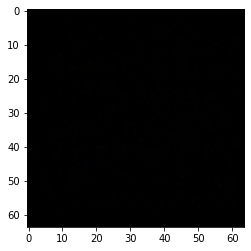

In [39]:
noise=tf.random.normal([1,1,1,100])
generated=g_model(noise,training=False)
plt.imshow(generated[0])

In [40]:
d_model(generated)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.49994707]], dtype=float32)>

def train_discriminator(d_model=d_model,samples=samples,n_iter=200):
    for i in range(n_iter):
        x_real,y_real=generate_real_avatars()
        _,real_acc=d_model.train_on_batch(x_real,y_real)
        x_fake,y_fake=generate_fake_avatars()
        _,fake_acc=d_model.train_on_batch(x_fake,y_fake)
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1,real_acc*100,fake_acc*100))

train_discriminator()

In [41]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [42]:
def discriminator_loss(real_output,fake_output):
    real_loss=cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss=real_loss+fake_loss
    return total_loss

In [43]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)

In [44]:
g_opt=tf.keras.optimizers.Adam(lr=.0001,beta_1=.5)
d_opt=tf.keras.optimizers.Adam(lr=.0001,beta_1=.5)

In [45]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint=tf.train.Checkpoint(generator_optimizer=g_opt,discriminator_optimizer=d_opt,generator=g_model,discriminator=d_model)

In [46]:
seed=tf.random.normal([16,1,1,100])
seed

<tf.Tensor: shape=(16, 1, 1, 100), dtype=float32, numpy=
array([[[[-1.4405328 , -0.51555955, -2.2307978 , ...,  0.4278933 ,
          -0.23274773,  1.2195035 ]]],


       [[[ 0.8434003 , -0.8683927 , -0.85349333, ...,  1.3771056 ,
           0.3035816 , -0.09608965]]],


       [[[-0.46136487,  2.5548737 ,  0.22814375, ..., -0.41932595,
          -1.2454231 ,  0.75459206]]],


       ...,


       [[[ 0.9861007 , -0.3701133 ,  2.0219293 , ...,  1.3917229 ,
           1.364487  ,  0.2386249 ]]],


       [[[-1.60631   , -0.15941626, -1.7364146 , ...,  0.8273103 ,
           0.09004989, -0.31080788]]],


       [[[ 0.4752618 ,  0.38227648,  1.6333611 , ...,  0.2105803 ,
           0.3655685 ,  0.60207605]]]], dtype=float32)>

In [47]:
def train_step(images):
    noise=tf.random.normal([16,1,1,100])
    with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
        fake_images=g_model(noise,training=True)
        real_output=d_model(images,training=True)
        fake_output=d_model(fake_images,training=True)
        g_loss=generator_loss(fake_output)
        d_loss=discriminator_loss(real_output,fake_output)
    gradients_of_g=g_tape.gradient(g_loss,g_model.trainable_variables)
    gradients_of_d=d_tape.gradient(d_loss,d_model.trainable_variables)
    g_opt.apply_gradients(zip(gradients_of_g,g_model.trainable_variables))
    d_opt.apply_gradients(zip(gradients_of_d,d_model.trainable_variables))

In [48]:
def train(dataset,epochs):
    for epoch in range(epochs):
        start=time.time()
        for img_batch in dataset:
            train_step(img_batch)
        if epoch>100 and (epoch+1)%50==0:
            save_plots(g_model,epoch+1,seed)
            print('Time for epoch {} is {} sec'.format(epoch+1,time.time()-start))
        elif epoch<=100 and (epoch+1)%10==0:
            save_plots(g_model,epoch+1,seed)
            print('Time for epoch {} is {} sec'.format(epoch+1,time.time()-start))
        elif epoch==0:
            save_plots(g_model,epoch+1,seed)
            print('Time for epoch {} is {} sec'.format(epoch+1,time.time()-start))
        
        if (epoch+1)%50==0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            #print('Time for epoch {} is {} sec'.format(epoch+1,time.time()-start))
    save_plots(g_model,epochs,seed)

In [49]:
def save_plots(g_model,epoch,seed):
    pred=g_model(seed,training=False)
    fig=plt.figure(figsize=(5,5))
    for i in range(pred.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow(pred[i])
        plt.axis('off')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0,wspace=0)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.savefig('./gen_plot/generator_plot_%03d.png'%(epoch))
    plt.show()

In [52]:
!mkdir gen_plot

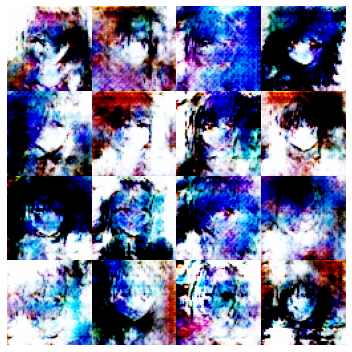

In [53]:
import time
import warnings

warnings.filterwarnings('ignore')

train(sample_data,1000)

In [50]:
!rm -rf gen_plot/

In [51]:
!rm -rf training_checkpoints/


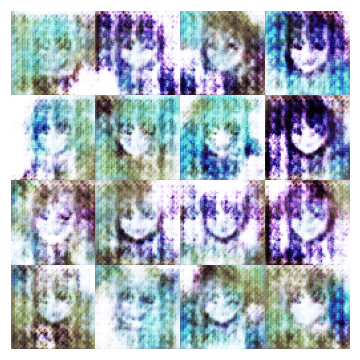

In [ ]:
import tensorflow_docs.vis.embed as embed

embed.embed_file(gif_)

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs